# 📘 Project: Predicting Student Performance
---
We aim to predict student performance using demographic and educational data.

### Steps:
- Load dataset
- Perform exploratory data analysis (EDA)
- Clean and preprocess the data
- Build models (Linear Regression, Random Forest)
- Evaluate performance
- Visualize feature importance


In [11]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [12]:
# 2. Load Dataset (upload CSV)
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Dataset shape:", df.shape)
df.head()

Saving student-mat_sample.csv to student-mat_sample (1).csv
Dataset shape: (600, 22)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,famsup,paid,activities,nursery,higher,internet,romantic,G1,G2,G3
0,GP,F,16,U,LE3,T,3,4,1,1,...,no,no,yes,yes,yes,yes,yes,18,20,20
1,GP,M,15,U,GT3,T,3,3,3,2,...,no,no,no,yes,yes,yes,yes,20,20,20
2,MS,M,20,U,LE3,A,4,3,2,2,...,no,no,no,yes,yes,no,no,17,20,19
3,GP,M,22,U,LE3,A,4,2,1,2,...,no,no,no,no,yes,no,yes,20,20,20
4,GP,M,17,U,LE3,A,2,4,2,3,...,yes,yes,no,yes,yes,yes,no,20,20,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      600 non-null    object
 1   sex         600 non-null    object
 2   age         600 non-null    int64 
 3   address     600 non-null    object
 4   famsize     600 non-null    object
 5   Pstatus     600 non-null    object
 6   Medu        600 non-null    int64 
 7   Fedu        600 non-null    int64 
 8   traveltime  600 non-null    int64 
 9   studytime   600 non-null    int64 
 10  failures    600 non-null    int64 
 11  schoolsup   600 non-null    object
 12  famsup      600 non-null    object
 13  paid        600 non-null    object
 14  activities  600 non-null    object
 15  nursery     600 non-null    object
 16  higher      600 non-null    object
 17  internet    600 non-null    object
 18  romantic    600 non-null    object
 19  G1          600 non-null    int64 
 20  G2        

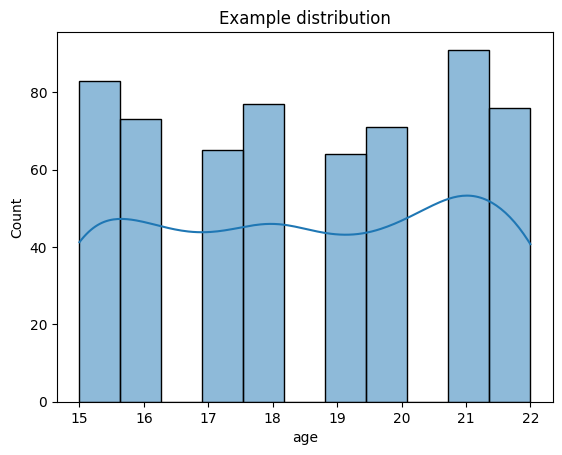

In [13]:
# 3. Data Exploration
df.info()
df.describe(include="all")
df.isnull().sum()

# Example distribution plot
sns.histplot(df.select_dtypes("number").iloc[:,0], kde=True)
plt.title("Example distribution")
plt.show()

In [14]:
# 4. Define Target Variable
target_col = None
if set(["math score","reading score","writing score"]).issubset(df.columns):
    df["avg_score"] = df[["math score","reading score","writing score"]].mean(axis=1)
    target_col = "avg_score"
elif "G3" in df.columns:
    target_col = "G3"
else:
    raise ValueError("Target column not found!")

print("Target variable:", target_col)

Target variable: G3


In [15]:
# 5. Train-Test Split
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 6. Preprocessing
numeric_features = X.select_dtypes(include=["int64","float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [17]:
# 7. Linear Regression Model
lr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("📊 Linear Regression Results:")
print("R2:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

📊 Linear Regression Results:
R2: 0.08871597023061029
RMSE: 1.0622664950870768
MAE: 0.6079376110827858


In [18]:
# 8. Random Forest Model with Hyperparameter Tuning
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

param_grid = {
    "regressor__n_estimators": [100, 200],
    "regressor__max_depth": [None, 10],
    "regressor__min_samples_split": [2, 5]
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, n_jobs=-1, scoring="r2")
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_rf = best_model.predict(X_test)

print("🌲 Random Forest Results:")
print("Best Params:", grid_search.best_params_)
print("R2:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))

🌲 Random Forest Results:
Best Params: {'regressor__max_depth': None, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}
R2: -0.17833025287371673
RMSE: 1.2079254121504508
MAE: 0.5359861441798941


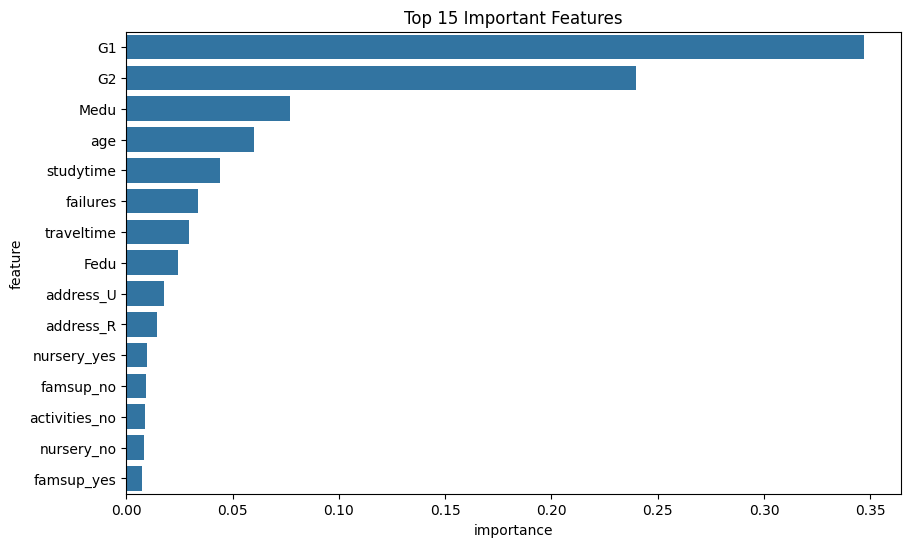

In [19]:
# 9. Feature Importance
encoder = best_model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
encoded_cat_features = encoder.get_feature_names_out(categorical_features)
all_features = list(numeric_features) + list(encoded_cat_features)

importances = best_model.named_steps["regressor"].feature_importances_
feat_imp = pd.DataFrame({"feature": all_features, "importance": importances})
feat_imp = feat_imp.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feat_imp.head(15))
plt.title("Top 15 Important Features")
plt.show()

## ✅ Conclusion
- Linear Regression gives a baseline performance
- Random Forest improves prediction with hyperparameter tuning
- Feature importance shows the most influential factors in student performance
